In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objs as go

In [9]:
data = pd.read_csv("/kaggle/input/ab-testing/AdSmartABdata.csv")

### Data Exploration
Initial data analysis done to understand what is in the dataset and characteristics of the data.

In [11]:
# check dataset shape
data.shape

(8077, 9)

In [15]:
#understanding data distribution
data.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [17]:
#description of data properties
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


#### I divided my data into two group, Participated and Not participated

In [ ]:
dataPart = data[~((data['yes']== 0) & (data['no']== 0))]
datanotPart =  data[(data['yes']== 0) & (data['no']== 0)]

#### Data Visualization

#### This function help us create more beautiful plots

In [19]:
#function to get the values in a plot
def get_value(figure):
    for p in figure.patches:
        figure.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')
        
        
#function to set figure parameters
def fig_att(figure, title, titlex, titley, size, sizexy, weight):
    #setting the parameters for the title, x and y labels of the plot
    figure.set_title(title, size=size, weight=weight)
    figure.set_xlabel(titlex, size=sizexy, weight=weight)
    figure.set_ylabel(titley, size=sizexy, weight=weight)

#function to change rotation of the x axis tick labels
def rotate(figure, rotation):
    #changing the rotation of the x axis tick labels 
    for item in figure.get_xticklabels():
        item.set_rotation(rotation)

#### Plot showing people in different categories of our Data

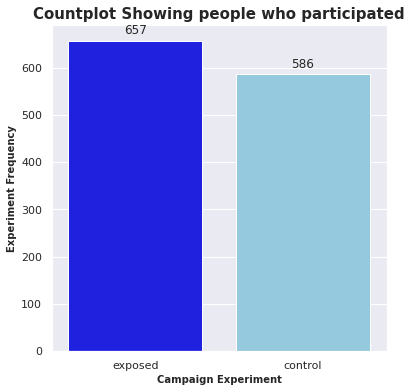

In [25]:
#seaborn countplot to show the ad campaign experiment
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["blue", "skyblue"], data=dataPart)

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot Showing people who participated", 
        "Campaign Experiment", "Experiment Frequency", 15, 10, "bold")

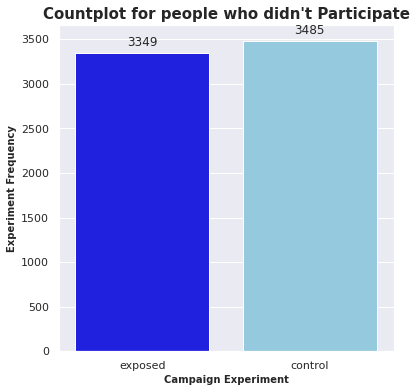

In [26]:
#seaborn countplot to show the ad campaign experiment
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["blue", "skyblue"], data=datanotPart)

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot for people who didn't Participate", 
        "Campaign Experiment", "Experiment Frequency", 15, 10, "bold")

### Ad Campaign Time

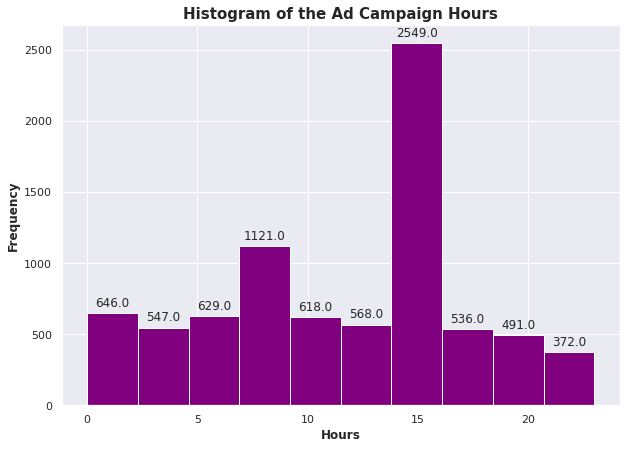

In [45]:
hour_plot = data.hour.plot(kind='hist', color='purple', figsize=(10,7))

#getting the values of the data
get_value(hour_plot)

#set the figure parameters
fig_att(hour_plot, 'Histogram of the Ad Campaign Hours', 
        'Hours', 'Frequency', 15, 12, 'bold')

#save the figure
plt.savefig('hour.png')

#### Time they saw the Campaign plot, for those who didn't participate

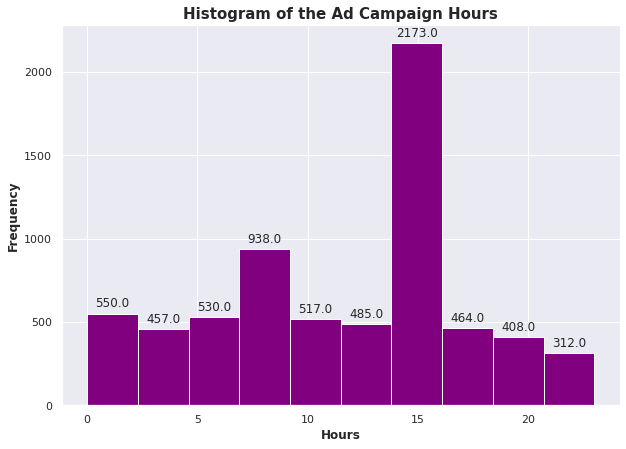

In [50]:
hour_plot = datanotPart.hour.plot(kind='hist', color='purple', figsize=(10,7))

#getting the values of the data
get_value(hour_plot)

#set the figure parameters
fig_att(hour_plot, 'Histogram of the Ad Campaign Hours', 
        'Hours', 'Frequency', 15, 12, 'bold')

#save the figure
plt.savefig('hour.png')

#### We notice here that 15:00 is the optimal time which recieves both the highest response and non responders, this is the time most of them check their phone.


In [68]:
#pie chart showing the prcentage of the experiment carried out
fig = go.Figure(data=[go.Pie(labels=['control','exposed'],
                            values=dataPart[['experiment']].value_counts(),
                            textinfo = 'label + percent',
                            title="Pie chart showing the percentage of Experiments")])
fig.show()

In [69]:
#pie chart showing the prcentage of the experiment carried out
fig = go.Figure(data=[go.Pie(labels=['control','exposed'],
                            values=datanotPart[['experiment']].value_counts(),
                            textinfo = 'label + percent',
                            title="Pie chart showing the percentage of Experiments")])
fig.show()

### Date of Campaign

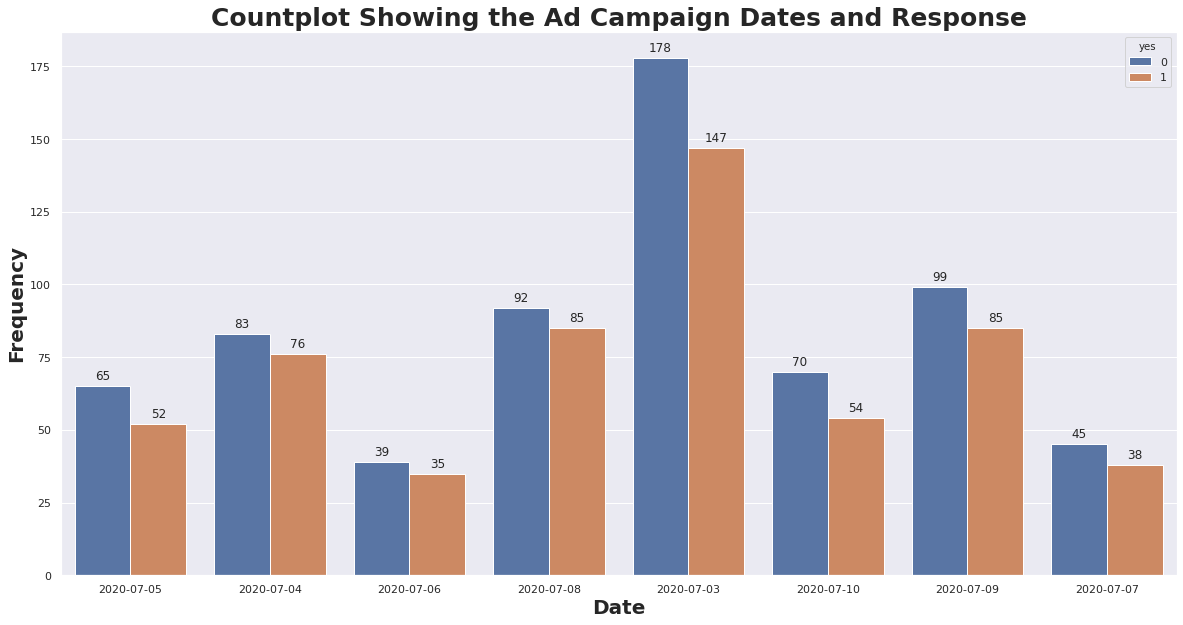

In [59]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="date", palette='deep', data=dataPart, hue='yes', )

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot Showing the Ad Campaign Dates and Response", 
        "Date", "Frequency", 25, 20, "bold")

plt.savefig('date_resp.png') #to save the figure
plt.show()

We had the highest Participation on 2020-07-03, there is always an higher number of no than yes on any given day

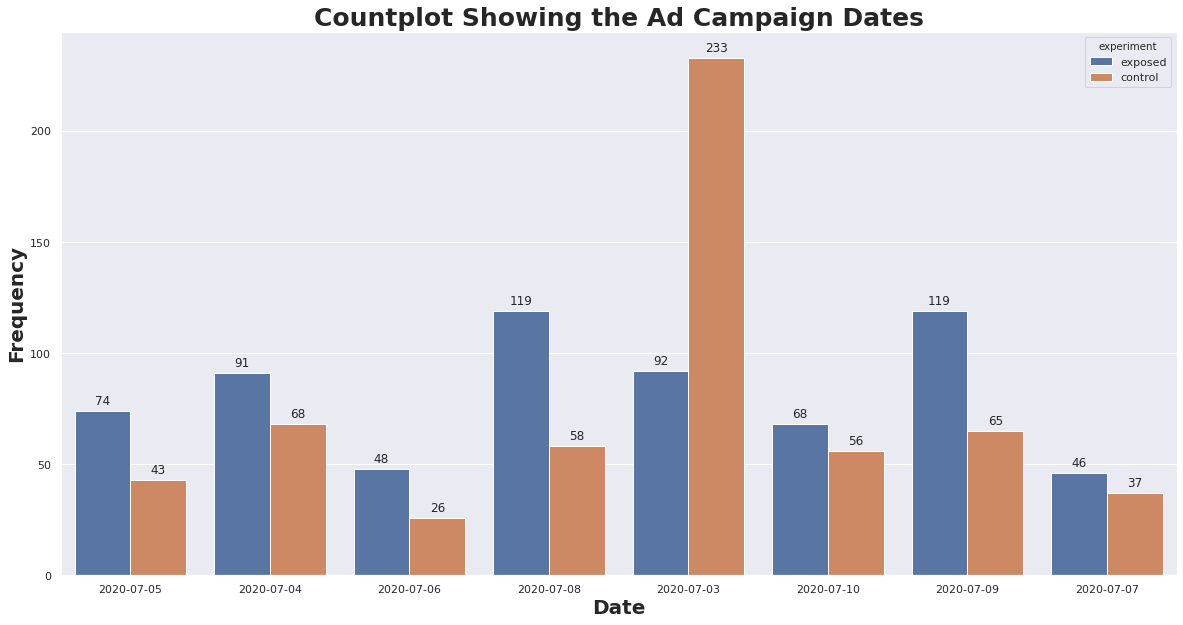

In [41]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="date", palette='deep', data=dataPart, hue='experiment', )

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot Showing the Ad Campaign Dates", 
        "Date", "Frequency", 25, 20, "bold")

plt.savefig('date_exp.png') #to save the figure
plt.show()

This is a distribution between the participant and where we had no participation in the experiment

### Plot showing participant and non participant Operating System distribution

#### Participant

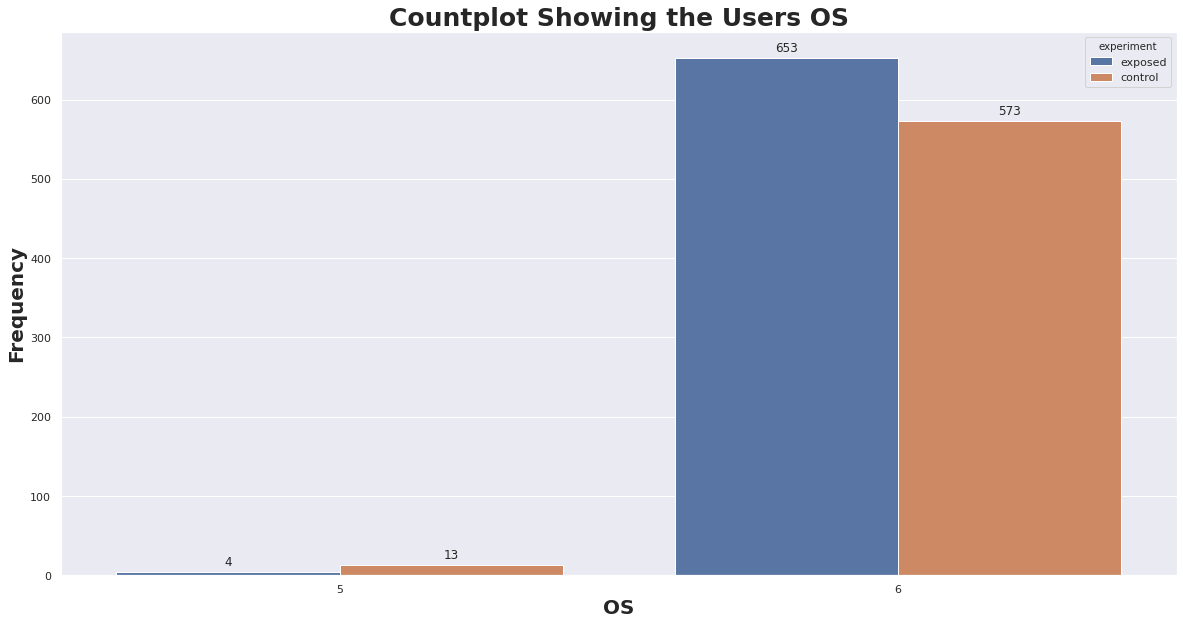

In [58]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="platform_os", palette='deep', data=dataPart, hue='experiment', )

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot Showing the Users OS", 
        "OS", "Frequency", 25, 20, "bold")

plt.savefig('oper.png') #to save the figure
plt.show()

One of the OS is not represented among the participant, 

#### Non-Participant

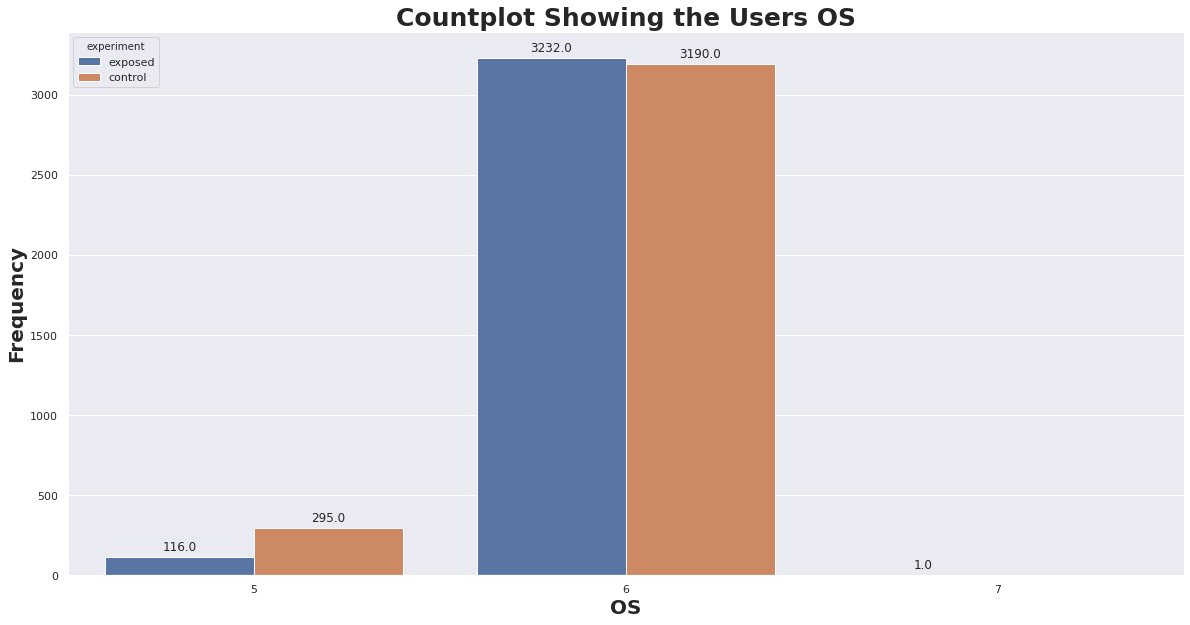

In [70]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="platform_os", palette='deep', data=datanotPart, hue='experiment', )

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot Showing the Users OS", 
        "OS", "Frequency", 25, 20, "bold")

plt.savefig('oper.png') #to save the figure
plt.show()

#### Plot showing participant and non participant Operating System distribution

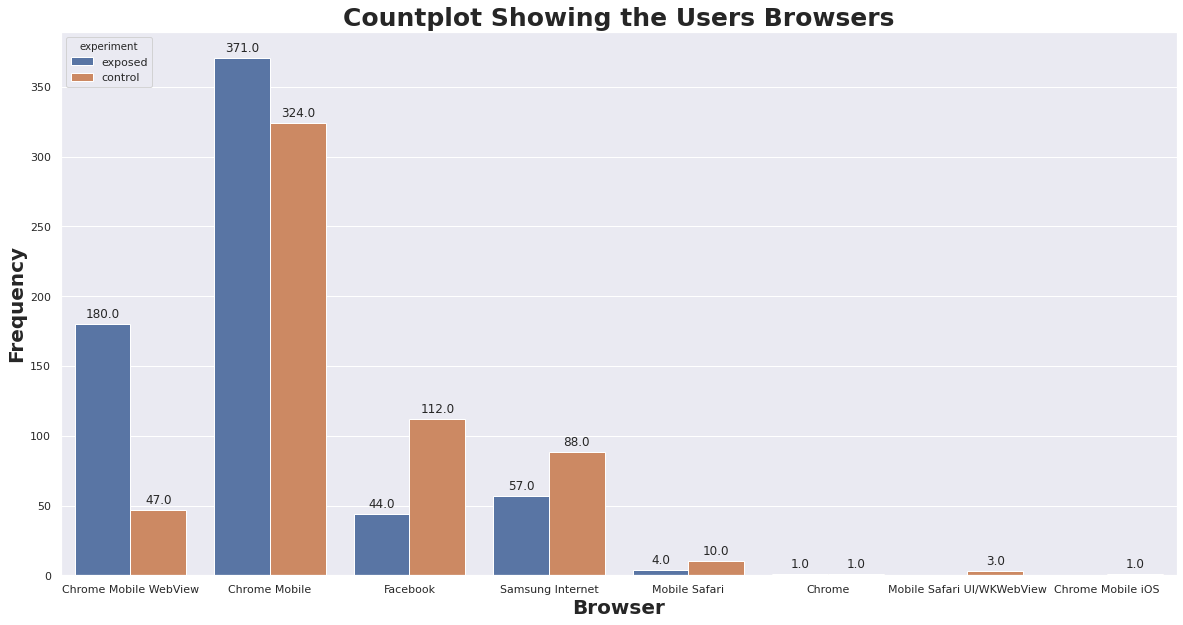

In [63]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=dataPart, hue='experiment', )

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot Showing the Users Browsers", 
        "Browser", "Frequency", 25, 20, "bold")

plt.savefig('browser.png') #to save the figure
plt.show()

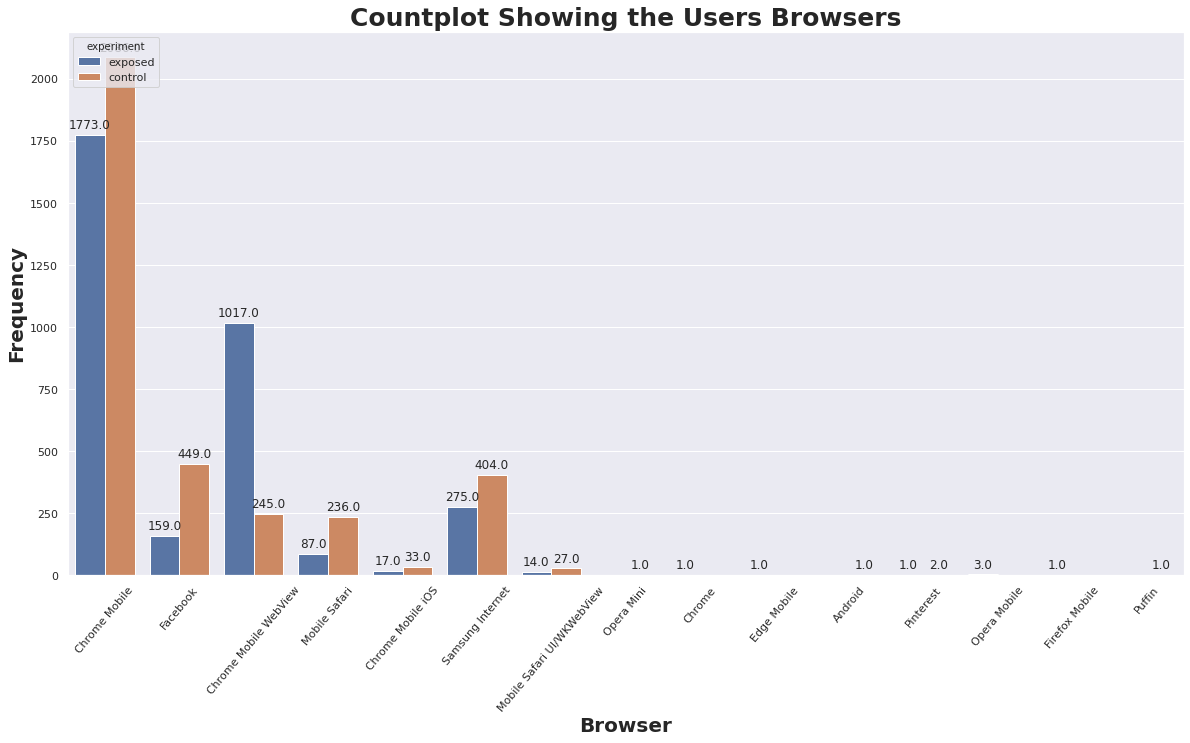

In [67]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=datanotPart, hue='experiment', )

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot Showing the Users Browsers", 
        "Browser", "Frequency", 25, 20, "bold")
rotate(ax, 50)
plt.savefig('browser.png') #to save the figure
plt.show()

#### Some of the browsers were not represented in the Experiment, we might assume they had challenges accessing the Questionnaire

### Users who participated plot for browser with response

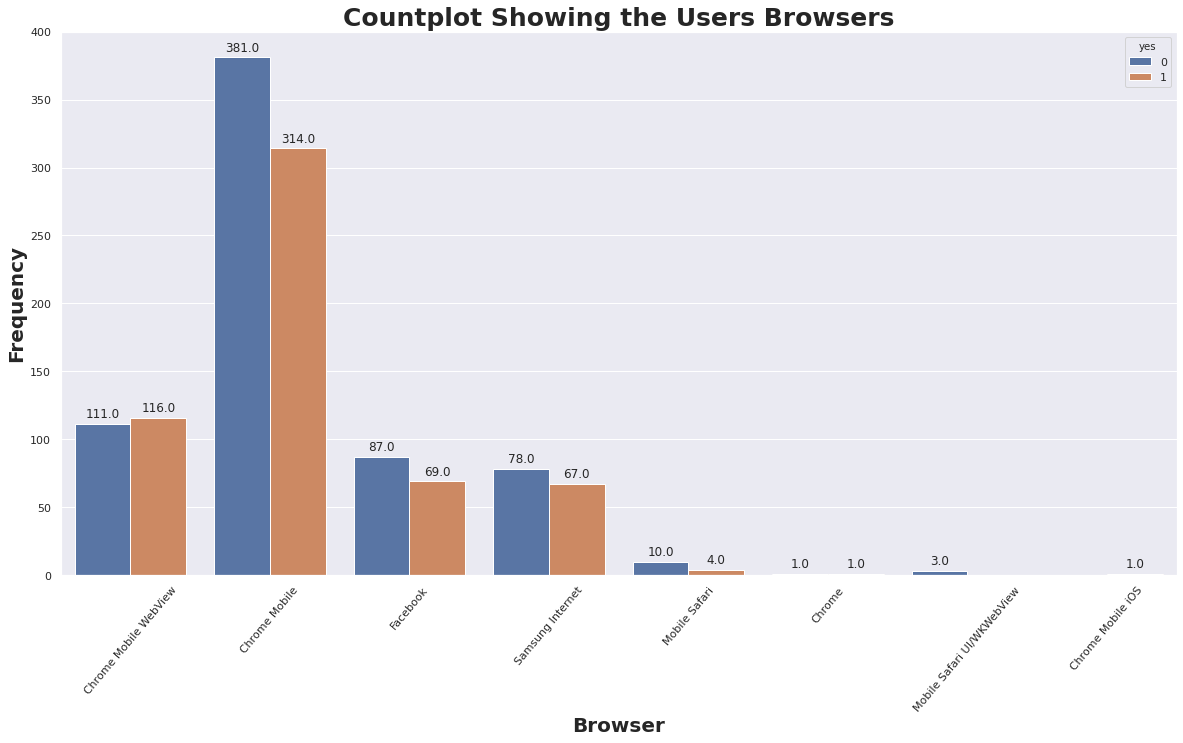

In [72]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=dataPart, hue='yes', )

#getting the values of the data
get_value(ax)

#set the figure paremeters
fig_att(ax, "Countplot Showing the Users Browsers", 
        "Browser", "Frequency", 25, 20, "bold")
rotate(ax, 50)
plt.savefig('browser.png') #to save the figure
plt.show()